In [1]:
import numpy as np
import sys

sys.path.append('../src')

import cpu
import program
import importlib
cpu = importlib.reload(cpu)
program = importlib.reload(program)

p = program.Program.from_file('../programs/initial_program.txt')
p_snake = program.Program.from_file('../programs/snake_game.txt')
p_first = program.Program.from_file('../programs/first_program.txt')
p_2 = program.Program.from_file('../programs/program2.txt')
p_branch = program.Program.from_file('../programs/branch_program.txt')
p = program.Program.from_array(np.array(['a9', 'c0', 'aa', 'e8', '69', 'c4', '00']))
p_push = program.Program.from_array(np.array(['a2', '00', 'a0', '00', '8a', '99', '00', '02', '48', 'e8', 'c8', 'c0', '10', 'd0', 'f5', '68', '99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_pull = program.Program.from_array(np.array(['99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_jump = program.Program.from_file('../programs/jump_program.txt')
p_jsr_rts = program.Program.from_file('../programs/jsr_rts.txt')

pygame 2.3.0 (SDL 2.24.2, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Initialise CPU
daveNES = cpu.MOS6502(debug = False)
daveNES.initialise_RAM()

In [3]:
daveNES.load_program(p_snake)
daveNES.reset()

In [4]:
daveNES.run_program()
#daveNES.ram.visualise_memory()
#print(daveNES.ram.memory[0x0200: 0x0205])
daveNES.reset()

c:\Users\David\Documents\Coding\daveNES\notebooks\../src\cpu.py:546: RuntimeWarning: overflow encountered in ubyte_scalars
  result = self.r_accumulator - value
c:\Users\David\Documents\Coding\daveNES\notebooks\../src\cpu.py:583: RuntimeWarning: overflow encountered in ubyte_scalars
  self.r_index_X -= np.uint8(1)


UP PRESSED
SBC performed
SBC performed


c:\Users\David\Documents\Coding\daveNES\notebooks\../src\cpu.py:732: RuntimeWarning: overflow encountered in ubyte_scalars
  result = a + (~b + self.r_status['flag_C'])


RIGHT PRESSED
DOWN PRESSED
DOWN PRESSED
DOWN PRESSED
DOWN PRESSED
DOWN PRESSED
DOWN PRESSED
DOWN PRESSED
RIGHT PRESSED
UP PRESSED
SBC performed
RIGHT PRESSED
UP PRESSED
RIGHT PRESSED
UP PRESSED
SBC performed


In [6]:
223 & 0x00

0

In [8]:
np.uint8(83) + ~(np.uint8(32)) + np.uint8(1)

C:\Users\David\AppData\Local\Temp\ipykernel_7752\548700149.py:1: RuntimeWarning: overflow encountered in ubyte_scalars
  np.uint8(83) + ~(np.uint8(32)) + np.uint8(1)


51

In [9]:
np.uint8(0xFE)

254

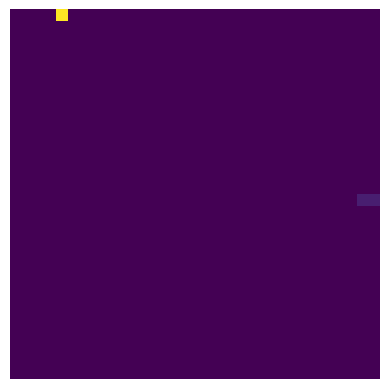

In [10]:
daveNES.ram.visualise_memory()

In [11]:
0x77

119

In [12]:
import pygame
import time

data = daveNES.ram.memory[0x0200:0x05FF+1]
data = np.reshape(data, (32, 32))

pygame.init()
screen = pygame.display.set_mode((320, 320))

surf = pygame.surfarray.make_surface(data)

scaled_surf = pygame.transform.scale(surf, (320, 320))

screen.blit(scaled_surf, (0, 0))

pygame.display.update()

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    time.sleep(0.01)
pygame.quit()